In [12]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [13]:
path = r'C:\Users\kshifera\Desktop\CF_Course\Immersion\Achievement_6\WorldEnergyConsumptionAnalysis'

### Import dataframe

In [57]:
# import dataframe
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'cleaned_601.csv'), index_col = False)

In [58]:
# check
df.shape

(3130, 136)

In [59]:
df.head()

,Unnamed: 0,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,...,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,electrification_rate,fossils?,renewables?,nuclear?,continent,gdp_per_capita
0,123,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,4.45,yes,yes,no,Asia,577.383256
1,124,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,9.29,yes,yes,no,Asia,559.778453
2,125,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,14.13,yes,yes,no,Asia,895.459054
3,126,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,18.97,yes,yes,no,Asia,930.634461
4,127,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,23.81,yes,yes,no,Asia,948.161439


In [60]:
# drop 'Unnamed'
df = df.drop(columns=['Unnamed: 0'])

### Create  a subset of dataframe

In [65]:
sub = df[['population', 'gdp', 'gdp_per_capita','fossil_electricity', 'greenhouse_gas_emissions', 'net_elec_imports', 'nuclear_electricity', 'renewables_electricity', 'electrification_rate']]

### Correlation 

In [66]:
# using pandas
sub.corr()

,population,gdp,gdp_per_capita,fossil_electricity,greenhouse_gas_emissions,net_elec_imports,nuclear_electricity,renewables_electricity,electrification_rate
population,1.000000,0.695235,-0.051822,0.711785,0.734506,0.011443,0.235979,0.647120,0.056727
gdp,0.695235,1.000000,0.195437,0.957884,0.940358,0.144793,0.761223,0.815738,0.179178
gdp_per_capita,-0.051822,0.195437,1.000000,0.139675,0.121052,0.015807,0.246113,0.146729,0.512958
fossil_electricity,0.711785,0.957884,0.139675,1.000000,0.996274,0.106432,0.649226,0.828739,0.144259
greenhouse_gas_emissions,0.734506,0.940358,0.121052,0.996274,1.000000,0.083430,0.608578,0.840008,0.133611
net_elec_imports,0.011443,0.144793,0.015807,0.106432,0.083430,1.000000,-0.025653,0.001845,0.001416
nuclear_electricity,0.235979,0.761223,0.246113,0.649226,0.608578,-0.025653,1.000000,0.478967,0.149014
renewables_electricity,0.647120,0.815738,0.146729,0.828739,0.840008,0.001845,0.478967,1.000000,0.159686
electrification_rate,0.056727,0.179178,0.512958,0.144259,0.133611,0.001416,0.149014,0.159686,1.000000


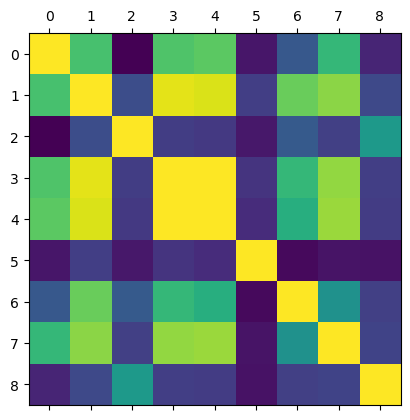

In [67]:
# correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

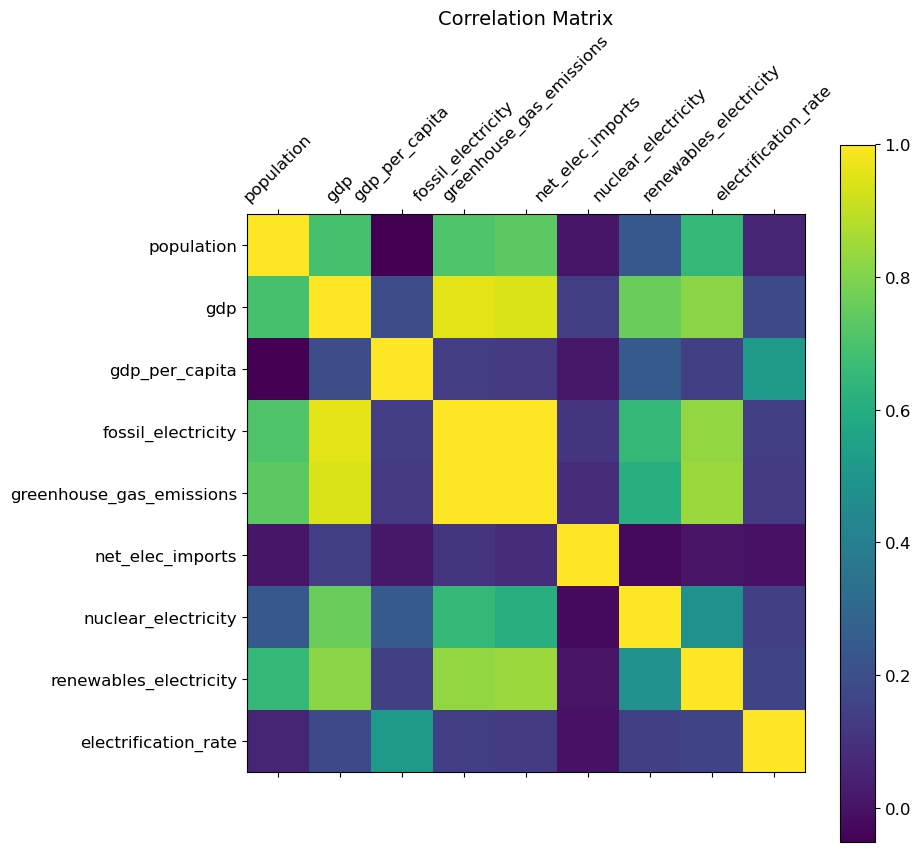

In [68]:
# add labels, legend and adjust size of heatmap
f = plt.figure(figsize=(9,9)) # figure size
plt.matshow(sub.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


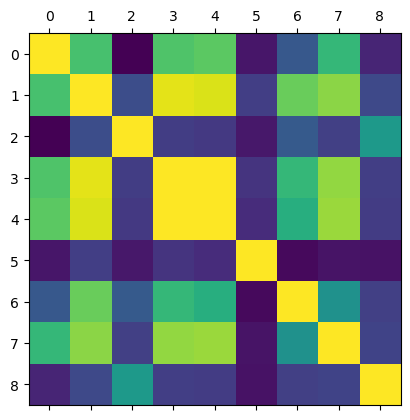

In [69]:
# save figure
plt.matshow(sub.corr())
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "cor1.png"))

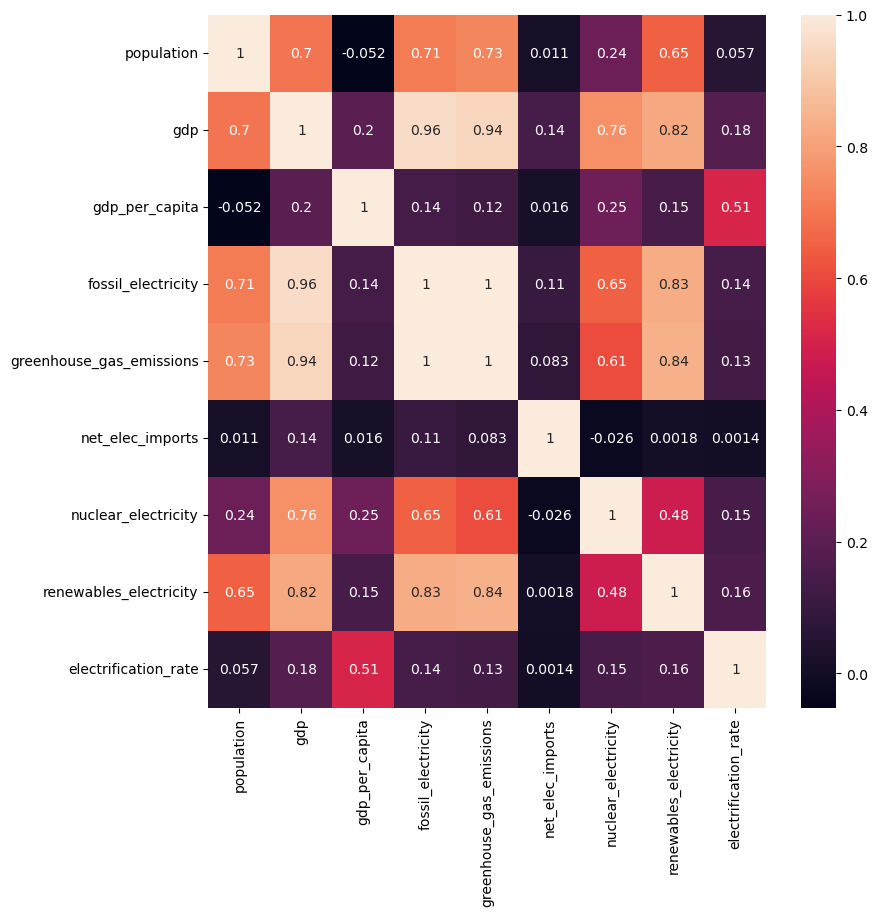

In [70]:
# create a subplot using matplotlib
f,ax = plt.subplots(figsize=(9,9))
# correlation heatmap using seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # the annot argument helps to place the correlation coefficients onto the map

####  The correlation coefficients indicate the strength of relationship between any pair of variables. Some of the strongest correlations exist between greenhouse gas emissions and population size, fossil_elec and population size, gdp and population size and renewables and population size (coeff. = 0.73, 0.71, 0.7 and 0.65, respectively), as one variable in the pair increases, so does the other. Oddly, renewables_electricity and greenhouse_gas_emissions have the strongest correlation of any pair (0.84). This can be counter intuitive, given the fact that renewables do not emit GHG and thus their higher increase could have meant decrease of emissions. However, it seems that the same countries who are the largest emitters also have the largest renewables in their electricity system. The increase of renewables did not reduce emissions as it did not translate to a decrease fossil fuels. In fact, fossil_electricity and renewables_electricity are strongly correlated (0.83), meaning that as the share of renewables increase, do does the share of fossil fuels, the increase in the latter most probabily outpacing the former's as evidenced by the net result which is an increase in emissions.  On the other hand, net_elec_imports and population and nuclear_electricity and electrification rate are some of the weakest in terms of being correlated. 

### Scatterplots

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


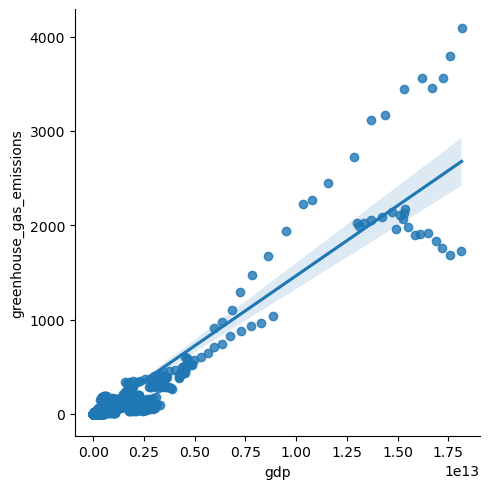

In [116]:
# scatterplot for "gdp" and "greenhouse gas emissions" columns in seaborn
sns.lmplot(x='gdp', y= 'greenhouse_gas_emissions', data = sub )

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


ValueError: Lengths must be equal

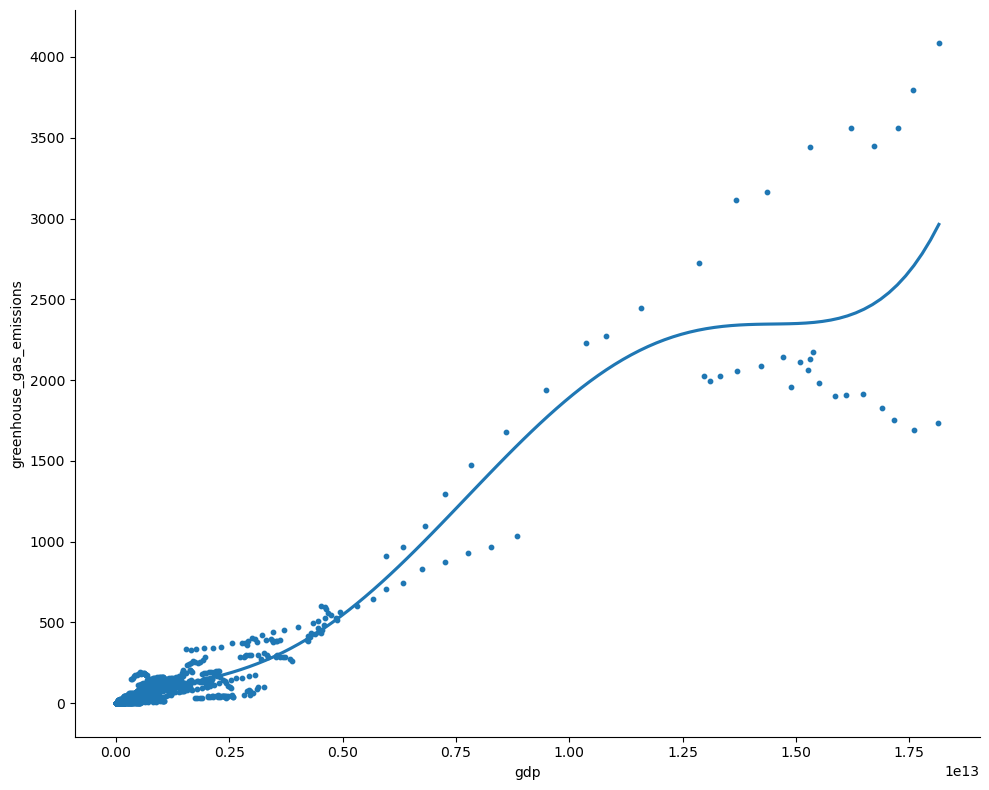

In [115]:
# plot the polynomial model
g = sns.lmplot(data=sub, x='gdp', y='greenhouse_gas_emissions',order=5, truncate=True, ci=None, scatter_kws={'s': 10, 'alpha': 1}, height=8, aspect=1.25)

# access the axes to add the polynomial model 
ax = g.axes.flat[0]

# plot the model for comparison
for gdp in zip(sub.gdp.unique()):
    data = sub[sub.gdp.eq(gdp)]
    p = np.poly1d(np.polyfit(sub.gdp, sub.greenhouse_gas_emissions, 5))
    xp = np.linspace(sub.gdp.min(), sub.gdp.max(), 1000)
    sns.lineplot(x=xp, y=p(xp), color='k', ax=ax, ls=':', legend=False)

#### While the correlation coefficient indicated at a positive correlation between the variables, scatterplot of gdp vs greenhouse_gas_emissions indicate that the relationship between the two values is best modeled not with a straight line but a curve. 

### Pairplots

In [104]:
# Variables we want in the pairplot
sub2=df[['gdp', 'gdp_per_capita','greenhouse_gas_emissions', 'electricity_demand', 'population']]

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


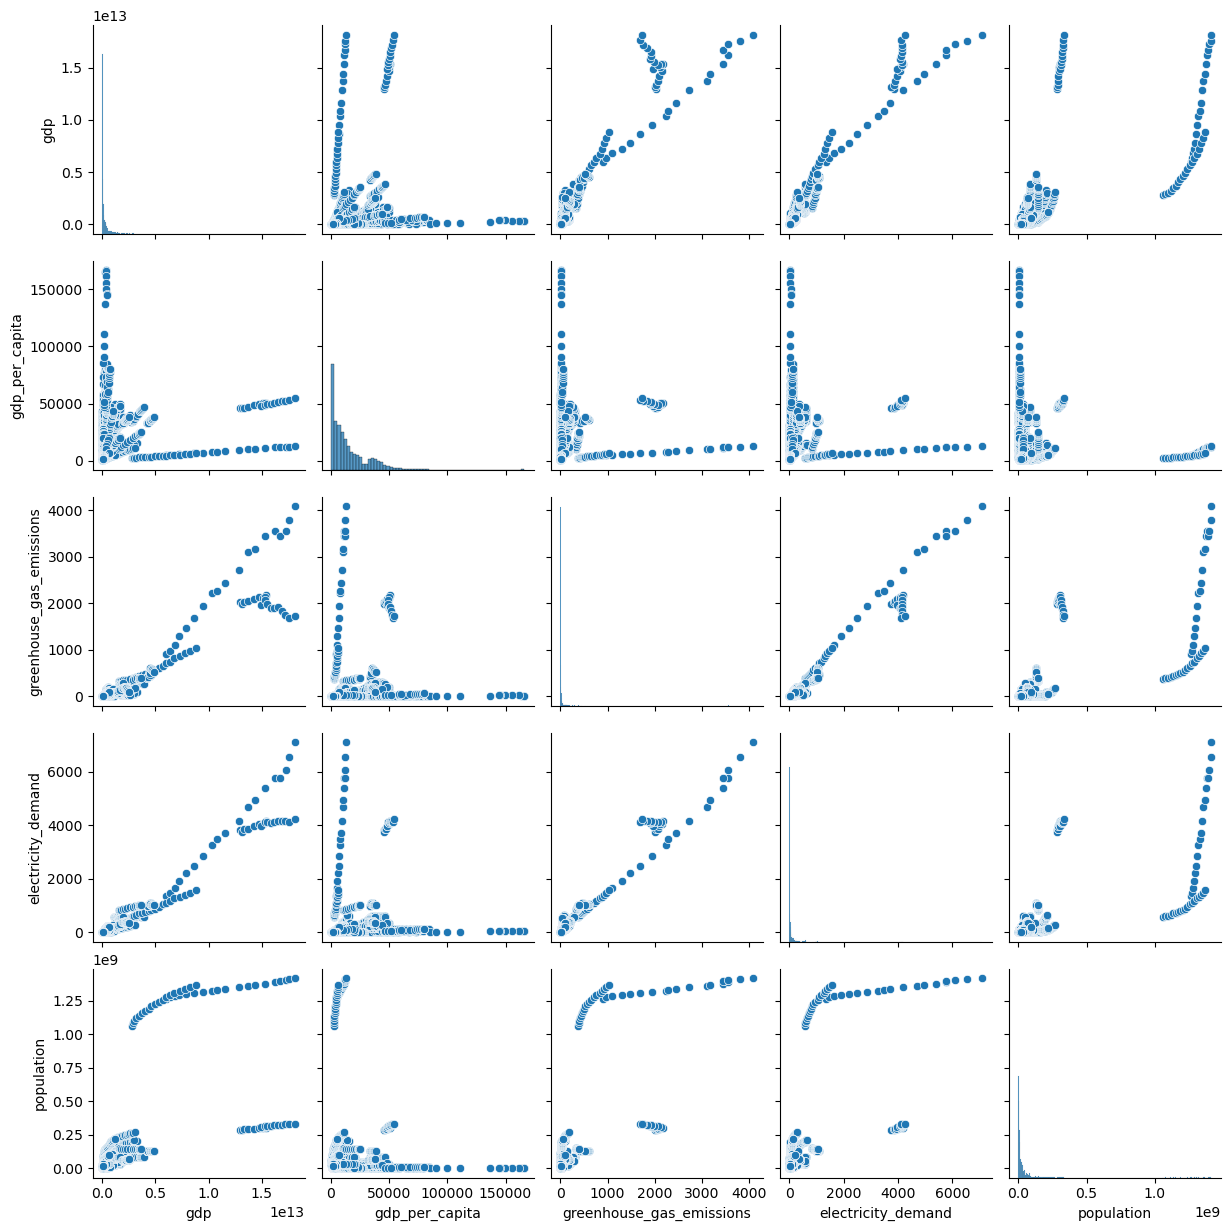

In [105]:
# create pairplots
g = sns.pairplot(sub2)

#### The pairplots of different variables indicate the relationship between any two of them. For instance, increase in electricity demand is associated with increase in greenhouse gas emissions. 

### Categorical plots

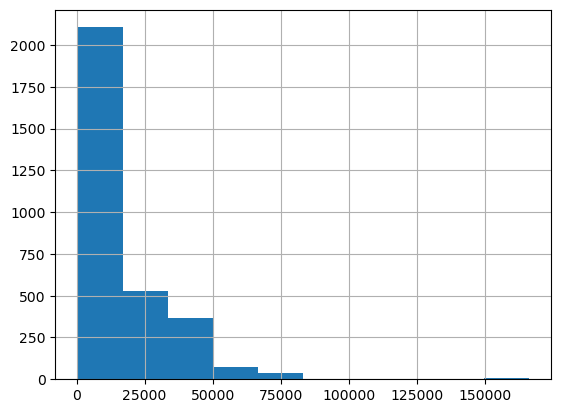

In [103]:
# create a histogram
df['gdp_per_capita'].hist()
plt.show()

#### Income can be grouped in to three as high income(>50000), middle income (15000 - 50000) and low income (<15000)

In [79]:
# create three income categories
# Define low-income group
df.loc[(df['gdp_per_capita'] < 15000) , 'income_group'] = 'low-income'

In [81]:
# Define middle-income group
df.loc[(df['gdp_per_capita'] >= 15000) & (df['gdp_per_capita'] < 50000 ), 'income_group'] = 'middle-income'

In [82]:
# Define high-income group
df.loc[(df['gdp_per_capita'] >= 50000) , 'income_group'] = 'high-income'

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='income_group', ylabel='greenhouse_gas_emissions'>

C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kshifera\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


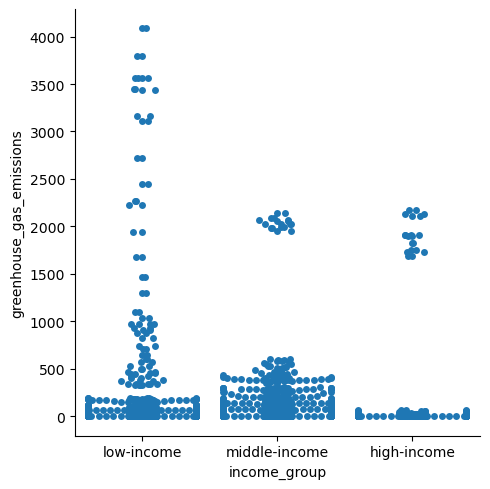

In [98]:
# categorical pairplots
sns.catplot(data = df, x = 'income_group', y = 'greenhouse_gas_emissions' )
sns.swarmplot(data=df, x = 'income_group', y = 'greenhouse_gas_emissions')

#### This categorical plot reveals a very intriguing insight: that greenhouse gas emissions is higher in lower income groups and lower in higher income groups

### Answers to some of the questions
1.Are there relations between the levels of CO2 emissions and the population size of the country?
There is a strong correlation between the levels of emissions and population size. 

2.Are there relations between the levels of CO2 emissions and the economic development of a country?
Generally, there seems to a linear, positive relationship between emissions and economic development


### Hypotheses

#### 1. If gdp per capita increases, greenhouse gas emissions from the electricity sector decreases. 
#### 2. If electricity demand increases, greenhouse gas emissions increase.

In [117]:
# Export as csv
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'T2.csv'))